In [ ]:
#獲取Forbes前三百中英名單及財富值

In [ ]:
#import requests
#from bs4 import BeautifulSoup
#import pandas as pd

In [ ]:
#url='http://www.forbeschina.com/review/list/002436.shtml'
#re = requests.get(url)
#re.encoding = 'utf-8'
#soup = BeautifulSoup(re.text,'html.parser')

In [ ]:
#right_table=soup.find('table', id='show_list')
#right_table

In [ ]:
#thead= [header.text for header in right_table.find_all('td')]
#print(thead)

In [ ]:
#headers=(thead[0:5])
#print(headers)

In [ ]:
#rows = []
#for row in right_table.find_all('tr'):
#    rows.append([val.text for val in row.find_all('td')])

In [ ]:
#for n,r in enumerate(rows):
#    print(n,r)
#    if n > 300: break

In [ ]:
#dfForbes = pd.DataFrame(rows, columns=headers)
#dfForbes

In [ ]:
#dfForbes.to_csv('pd_namelists.csv')

In [ ]:
#獲取生日並生成對應星座

In [1]:
import requests 
from bs4 import BeautifulSoup
import bs4 as bs
import csv
import pandas as pd

In [2]:
forbes = pd.read_csv('pd_namelists.csv',usecols=[3])
forbes['姓名（英文）'].head(12)
#the first 12 rows of datasets used for analysis

0                    Jeff Bezos
1                    Bill Gates
2                Warren Buffett
3      Bernard Arnault & family
4               Mark Zuckerberg
5                Amancio Ortega
6     Carlos Slim Helu & family
7                  Charles Koch
8                    David Koch
9                 Larry Ellison
10            Michael Bloomberg
11                   Larry Page
Name: 姓名（英文）, dtype: object

In [3]:
forbeslist = forbes['姓名（英文）'].str.replace(' & family','')
print(forbeslist.head(12))

0            Jeff Bezos
1            Bill Gates
2        Warren Buffett
3       Bernard Arnault
4       Mark Zuckerberg
5        Amancio Ortega
6      Carlos Slim Helu
7          Charles Koch
8            David Koch
9         Larry Ellison
10    Michael Bloomberg
11           Larry Page
Name: 姓名（英文）, dtype: object


In [4]:
births = []  
names = [str(i) for i in forbeslist.head(12)]
for name in names:
    source = requests.get('https://en.wikipedia.org/wiki/' + name)
    page_html = bs.BeautifulSoup(source.content, 'html.parser')
    bdayscontainer = page_html.find_all('span', attrs = {'bday'}) 
    if len(bdayscontainer)!=0:
        for a in bdayscontainer:
            bdayscontainers = a.get_text()
            births.append(bdayscontainers)
    else:
        bdayscontainers = "null"
        births.append(bdayscontainers)    
print(births)

['1964-01-12', '1955-10-28', '1930-08-30', '1949-03-05', '1984-05-14', '1936-03-28', '1940-01-28', '1935-11-01', '1940-05-03', '1944-08-17', '1942-02-14', '1973-03-26']


In [5]:
from pandas.core.frame import DataFrame 
birthdata=DataFrame(births)
print(birthdata)

             0
0   1964-01-12
1   1955-10-28
2   1930-08-30
3   1949-03-05
4   1984-05-14
5   1936-03-28
6   1940-01-28
7   1935-11-01
8   1940-05-03
9   1944-08-17
10  1942-02-14
11  1973-03-26


In [6]:
birthdata.columns = ['生日']
forbesdata = forbeslist.head(12)
borndata = pd.concat((forbesdata, birthdata), axis = 1)
borndata.set_index('姓名（英文）')
birthdaydata = borndata['生日'].str.split('-', expand = True)
birthdaydata

,0,1,2
0,1964,01,12
1,1955,10,28
2,1930,08,30
3,1949,03,05
4,1984,05,14
5,1936,03,28
6,1940,01,28
7,1935,11,01
8,1940,05,03
9,1944,08,17


In [7]:
birthdayfinal = pd.merge (borndata, birthdaydata, left_index=True, right_index=True, how='outer')
birthdayfinal.columns = ['name', 'birthday', 'year', 'month', 'day']
birthdayfinal.info()
birthdayfinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
name        12 non-null object
birthday    12 non-null object
year        12 non-null object
month       12 non-null object
day         12 non-null object
dtypes: object(5)
memory usage: 560.0+ bytes


,name,birthday,year,month,day
0,Jeff Bezos,1964-01-12,1964,01,12
1,Bill Gates,1955-10-28,1955,10,28
2,Warren Buffett,1930-08-30,1930,08,30
3,Bernard Arnault,1949-03-05,1949,03,05
4,Mark Zuckerberg,1984-05-14,1984,05,14
5,Amancio Ortega,1936-03-28,1936,03,28
6,Carlos Slim Helu,1940-01-28,1940,01,28
7,Charles Koch,1935-11-01,1935,11,01
8,David Koch,1940-05-03,1940,05,03
9,Larry Ellison,1944-08-17,1944,08,17


In [8]:
stardata = birthdayfinal.dropna(subset=["name", "year", "month", "day"])
mlist = stardata['month'].astype(int)
print(type(mlist))
print(len(mlist))
dlist = stardata['day'].astype(int)
print(type(dlist))
print(len(dlist))

<class 'pandas.core.series.Series'>
12
<class 'pandas.core.series.Series'>
12


In [9]:
xzlist = []  
for month, date in zip(dlist, mlist):
    def get_constellation(month,date):
        dates = (20,19,21,20,21,22,23,23,23,24,23,22)
        constellations = ("摩羯","水瓶","双鱼","白羊","金牛","双子","巨蟹","狮子","处女","天秤","天蝎","射手","摩羯")
        if (date < dates[month-1]):
            return constellations[month-1]
        else:
            return constellations[month]
    xz = get_constellation(date,month)
    xzlist.append(xz)
print(xzlist) 

['摩羯', '天蝎', '处女', '双鱼', '金牛', '白羊', '水瓶', '天蝎', '金牛', '狮子', '水瓶', '白羊']


In [10]:
xzlistdata=DataFrame(xzlist)
xzlistdata.columns = ['星座']
print(len(xzlistdata))

12


In [11]:
stardata2 = stardata.reset_index(drop=True)
wholedata = pd.merge (stardata2, xzlistdata, left_index=True, right_index=True, how='outer')
wholedata

,name,birthday,year,month,day,星座
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯
1,Bill Gates,1955-10-28,1955,10,28,天蝎
2,Warren Buffett,1930-08-30,1930,08,30,处女
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛
5,Amancio Ortega,1936-03-28,1936,03,28,白羊
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶
7,Charles Koch,1935-11-01,1935,11,01,天蝎
8,David Koch,1940-05-03,1940,05,03,金牛
9,Larry Ellison,1944-08-17,1944,08,17,狮子


In [12]:
import pandas as pd
value = pd.read_csv('pd_namelists.csv',usecols=[4])
value.head(12)
forbes_value = pd.merge(wholedata, value, left_index=True, right_index=True, how='outer')
finaldata_clear = forbes_value.dropna(subset=['name', 'birthday', 'year', 'month','day','财富值（亿美元）'])
print(len(finaldata_clear))
finaldata_clear

12


,name,birthday,year,month,day,星座,财富值（亿美元）
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯,1120
1,Bill Gates,1955-10-28,1955,10,28,天蝎,900
2,Warren Buffett,1930-08-30,1930,08,30,处女,840
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼,720
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛,710
5,Amancio Ortega,1936-03-28,1936,03,28,白羊,700
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶,671
7,Charles Koch,1935-11-01,1935,11,01,天蝎,600
8,David Koch,1940-05-03,1940,05,03,金牛,600
9,Larry Ellison,1944-08-17,1944,08,17,狮子,585


In [13]:
finaldata_clear.to_csv('pd_finaldataclear12.csv')

In [14]:
#分析部分

In [17]:
import matplotlib.pyplot as plt
g1_1 = wholedata
#g1_1=g1_1.drop(69) #去除無效數據

In [18]:
print(len(g1_1))
g1_1['星座'].value_counts()

12


白羊    2
天蝎    2
水瓶    2
金牛    2
狮子    1
处女    1
双鱼    1
摩羯    1
Name: 星座, dtype: int64

Text(0.5,1,'福布斯榜各星座比重')

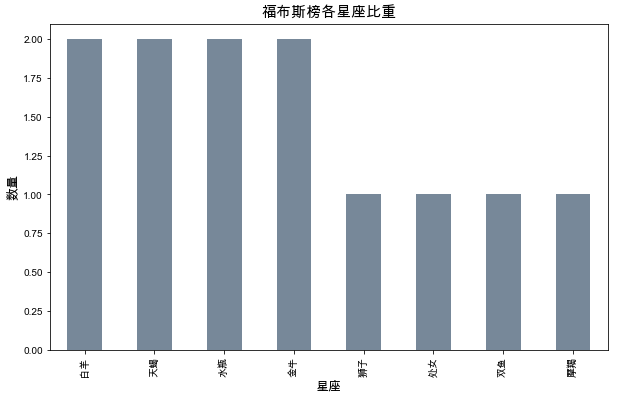

In [20]:
#plt.rcParams['font.sans-serif']=['SimHei'] #在windows環境下解決matplotlib中文亂碼
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #在mac環境下解決matplotlib中文亂碼
fig=plt.figure(figsize=(10,6)) 
g1_1['星座'].value_counts().plot(kind='bar',color='#778899')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('福布斯榜各星座比重',size=15)

In [ ]:
#g1_a=g1_1['星座'].head(48) #取12的整數倍進行分層
#print(len(g1_a))
#g1_a.value_counts()

In [ ]:
#g1avaluecounts=g1_a.value_counts()
#dict1=dict(g1avaluecounts)
#dict1['射手'] = '0' 
#print(dict1)

In [ ]:
#arr = list(dict1.items())
#g1_aa = pd.DataFrame(list(dict1.items()), columns=['星座', '数量'])
#g1_xzorder=g1_aa["星座"].tolist()
#print(g1_xzorder) 
#g1_aa

In [ ]:
#fig=plt.figure(figsize=(10,6)) 
#g1_a.value_counts().plot(kind='bar',color='#b0e0e6')
#plt.xlabel('星座',size=13)
#plt.ylabel('数量',size=13)
#plt.title('前四十八名内各星座比重',size=15)

In [ ]:
#g1_b=g1_1['星座'].head(96)
#print(len(g1_b))
#g1_b.value_counts()

In [ ]:
#fig=plt.figure(figsize=(10,6)) 
#g1_b.value_counts().plot(kind='bar',color='#ffffff')
#g1_b.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
#plt.xlabel('星座',size=13)
#plt.ylabel('数量',size=13)
#plt.title('前九十六名内各星座比重',size=15)

In [ ]:
#g1_c=g1_1['星座'].head(144) 
#print(len(g1_c))
#g1_c.value_counts()

In [ ]:
#fig=plt.figure(figsize=(10,6)) 
#g1_c.value_counts().plot(kind='bar',color='#ffffff')
#g1_c.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
#plt.xlabel('星座',size=13)
#plt.ylabel('数量',size=13)
#plt.title('前一百四十四名内各星座比重',size=15)
#plt.yticks([0, 1])

In [ ]:
#g1_d=g1_1['星座'].head(192)
#print(len(g1_d))
#g1_d.value_counts()

In [ ]:
#fig=plt.figure(figsize=(10,6)) 
#g1_d.value_counts().plot(kind='bar',color='#ffffff')
#g1_d.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
#plt.xlabel('星座',size=13)
#plt.ylabel('数量',size=13)
#plt.title('前一百九十二名内各星座比重',size=15)

In [ ]:
#g1a=g1_a.value_counts()
#a_ranking=dict(g1a)
#print(a_ranking)
#print(len(a_ranking))

In [ ]:
#a_ranking['射手'] = '0' #重新添加g1_a.value_counts()中被過濾掉的0次射手座
#print(a_ranking)
#print(len(a_ranking))

In [ ]:
#g1b=g1_b.value_counts()
#b_ranking=dict(g1b)
#print(b_ranking)
#print(len(b_ranking))
#g1c=g1_c.value_counts()
#c_ranking=dict(g1c)
#print(c_ranking)
#print(len(c_ranking))
#g1d=g1_d.value_counts()
#d_ranking=dict(g1d)
#print(d_ranking)
#print(len(d_ranking))

In [ ]:
#from pandas import DataFrame
#from pandas.plotting import parallel_coordinates

In [ ]:
#df_g1=DataFrame({'星座':['天秤','水瓶','双鱼','金牛','处女','狮子','白羊','双子','巨蟹','天蝎','摩羯','射手'],'前四十八名':[2,3,3,1,3,2,2,3,4,1,5,6],'前九十六名':[2,5,4,1,7,5,3,4,6,5,8,9],'前一百四十四名':[3,6,1,2,5,4,6,5,6,5,7,8],'前一百九十二名':[1,2,2,2,4,3,4,4,5,6,7,8]})

In [ ]:
#fig=plt.figure(figsize=(12,10)) 
#plt.ylabel('所占比重在十二星座内的名次',size=15)
#parallel_coordinates(df_g1,'星座')
#plt.ylim((9, 1))

In [21]:
value = pd.read_csv('pd_namelists.csv',usecols=[4])
value.head(12)
forbes_value = pd.merge(wholedata, value, left_index=True, right_index=True, how='outer')
finaldata_clear = forbes_value.dropna(subset=['name', 'birthday', 'year', 'month','day','财富值（亿美元）'])
print(len(finaldata_clear))
finaldata_clear

12


,name,birthday,year,month,day,星座,财富值（亿美元）
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯,1120
1,Bill Gates,1955-10-28,1955,10,28,天蝎,900
2,Warren Buffett,1930-08-30,1930,08,30,处女,840
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼,720
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛,710
5,Amancio Ortega,1936-03-28,1936,03,28,白羊,700
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶,671
7,Charles Koch,1935-11-01,1935,11,01,天蝎,600
8,David Koch,1940-05-03,1940,05,03,金牛,600
9,Larry Ellison,1944-08-17,1944,08,17,狮子,585


In [22]:
valueclear=finaldata_clear['财富值（亿美元）']
value1=DataFrame(valueclear)
value2=value1.reset_index(drop=True)
value_xz=pd.merge(xzlistdata, value2, left_index=True, right_index=True, how='outer')
value_xz

,星座,财富值（亿美元）
0,摩羯,1120
1,天蝎,900
2,处女,840
3,双鱼,720
4,金牛,710
5,白羊,700
6,水瓶,671
7,天蝎,600
8,金牛,600
9,狮子,585


In [23]:
grouped = value_xz['财富值（亿美元）'].groupby(value_xz['星座'])
sumvalue=DataFrame(grouped.sum())

In [24]:
sumvalue.to_csv('pd_sumvalue12.csv')

In [25]:
sumvalue1 = pd.read_csv('pd_sumvalue12.csv')
sumvalue2 = sumvalue1.sort_values(by="财富值（亿美元）", ascending=False)
sumvalue2

,星座,财富值（亿美元）
2,天蝎,1500
7,金牛,1310
6,白羊,1188
4,水瓶,1171
3,摩羯,1120
1,处女,840
0,双鱼,720
5,狮子,585


In [104]:
import matplotlib.pyplot as plt
import squarify

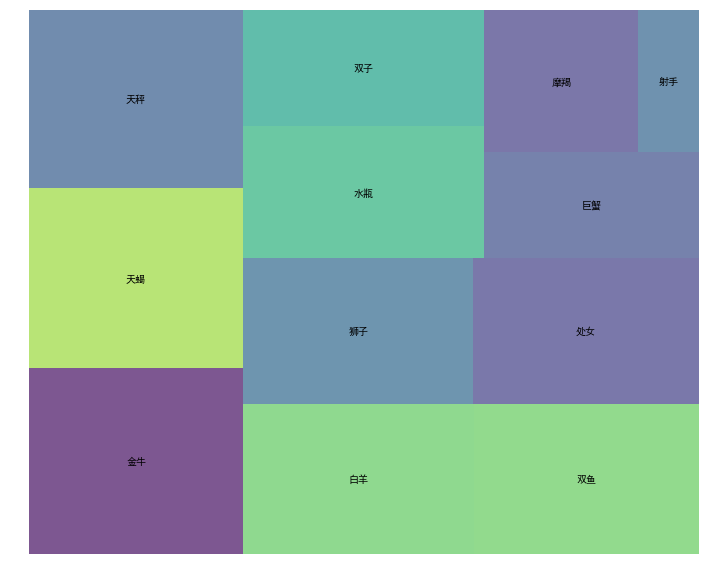

In [108]:
fig=plt.figure(figsize=(12,10))
squarify.plot(sizes=sumvalue2['财富值（亿美元）'], label=sumvalue2['星座'], alpha=.7 )
plt.axis('off')
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()